In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE_2.csv')

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### we dont need the day, month and year features as we are only taking the 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'Temperature', 'Classes', 'Region' as input features and predict the output feature 'FWI'

In [5]:
# drop day month an year
dataset=dataset.drop(['day','month','year'],axis=1)

In [6]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
dataset['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

### Encoding 

In [8]:
dataset['Classes']=np.where(dataset['Classes'].str.contains('not fire'),0,1)

In [9]:
dataset.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [10]:
dataset['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [11]:
# Segregate the independent and dependent features 
x=dataset.drop('FWI',axis=1)  # x contains all features except the fwi features
y=dataset['FWI']

In [12]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [16]:
# observe correlation between features
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


#### Suppose we have set a treshold value of 85 % if correlation between 2 independent feature is greater than 85% than drop one feature.

Why we do so?

Let 2 feature is 90% correlated, if we increase one feature than other feature also increasing then both the features will have similar effect on the model prediction so we can drop any one of the features from them.

### Multicollinearity 
In this concept the independent feature is highly correlated then any one of the feature gets ignored while prediction as both will act similarly.

### Check for multicollinearity

<AxesSubplot: >

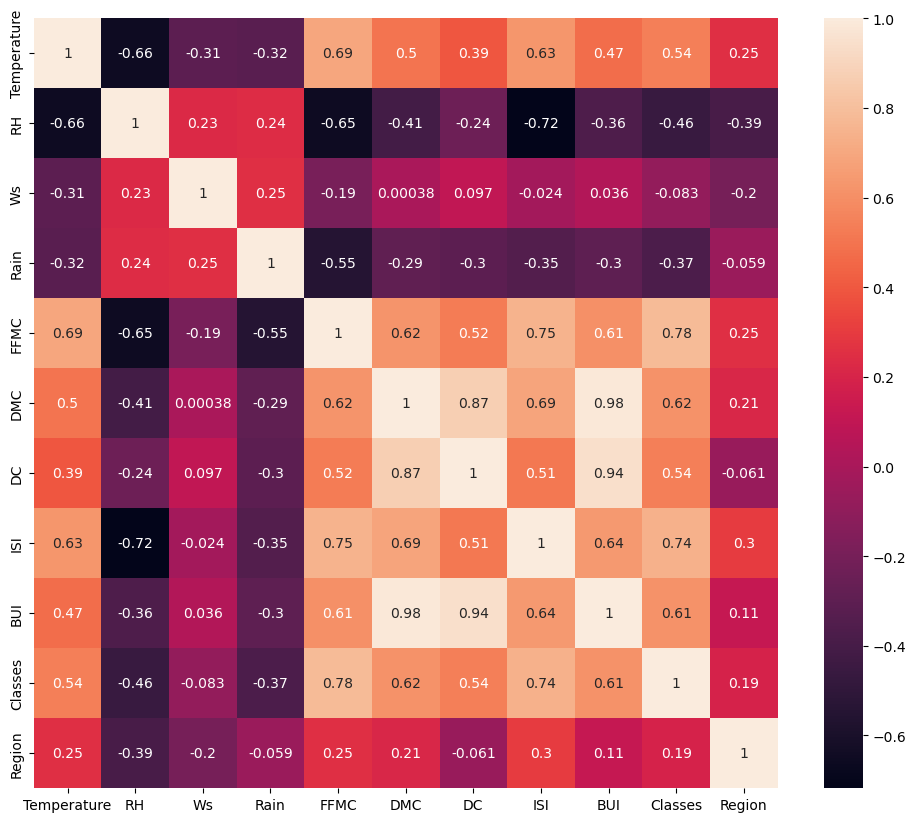

In [17]:
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [18]:
def correlation(dataset,threshold):   # feature should not be greater than this threshold
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [19]:
# threshold domain expertise 
corr_features=correlation(x_train,0.85)

In [20]:
corr_features  #these 2 features have greater than 0.85 correlation

{'BUI', 'DC'}

In [21]:
# drop features when greater than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape    # 182 rows and 9 column and 61 rows and 9 column left respectively 

((182, 9), (61, 9))

### Feature Scaling and Standarization

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [24]:
x_train_scaler

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

/tmp/ipykernel_1555/1067935770.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'train data after scaling')

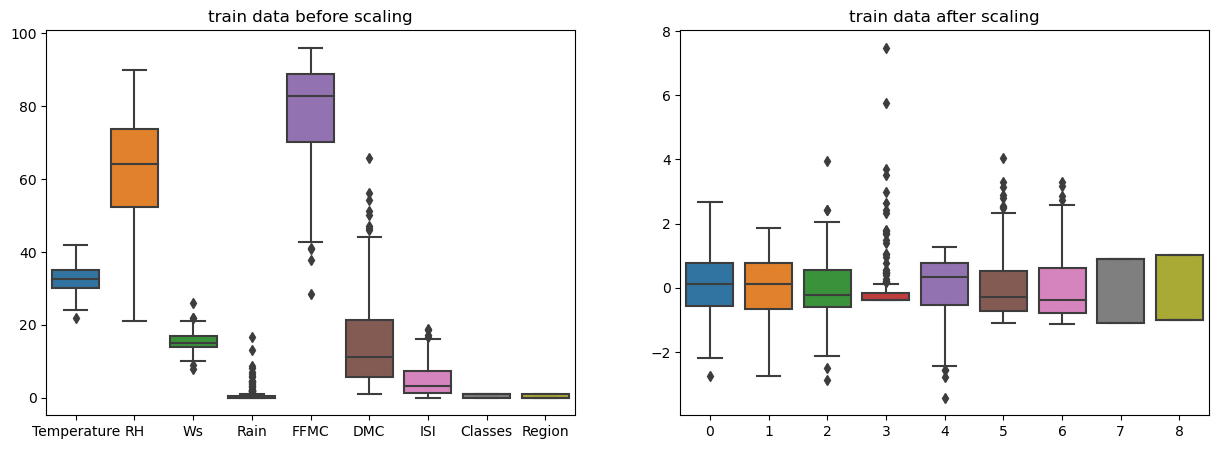

In [25]:
### Boxplot to understand the effect of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('train data before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaler)
plt.title('train data after scaling')

### Linear Regression model

Mean square error 0.5468236465249985
R2 Score 0.9847657384266951


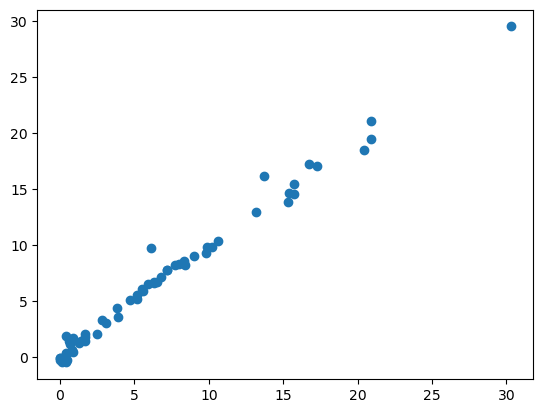

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaler,y_train)
y_pred=linreg.predict(x_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean square error',mae)
print('R2 Score',score)
plt.scatter(y_test,y_pred)  # This gives 98% accuracy which is very good

### Lasso Regression

Mean absolute error: 1.133175994914409
The score is: 0.9492020263112388


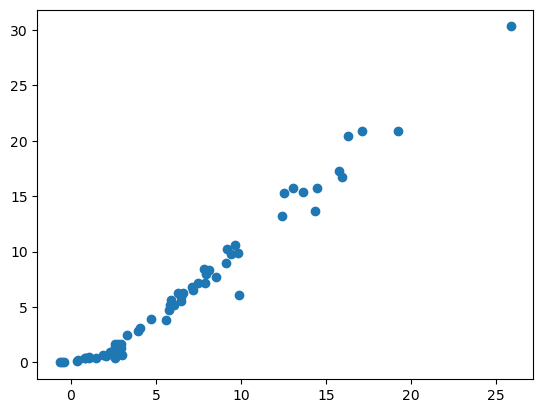

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaler,y_train)
y_pred=lasso.predict(x_test_scaler)
mae=mean_absolute_error(y_pred,y_test)
score=r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print('The score is:',score)
plt.scatter(y_pred,y_test)   # This gives 94% accuracy which is very good

### Cross validation
dataset divided into : Train and test data

train dataset fruther divided into: train and validatio data 

Train data is for training of the model

Validation data is used for doing hyperparameter tuning 

Let training data is 1000 and if we say corss validation=5. It means our training data will divided into 5 parts(each of 200 data points)

1000/5=200. Now 

1) for cv= 1st instance, first part of 200 data (0-200) will beacome validate data and rest 800 will become train data(let accuracy comes 1)

2) for cv= 2st instance, second part of 200 data (201-400) will beacome validate data and rest 800 will become train data(let accuracy comes 2)

3) for cv= 3st instance, Third part of 200 data (401-600) will beacome validate data and rest 800 will become train data(let accuracy comes 3)

4) for cv= 4st instance, Fourth part of 200 data (601-800) will beacome validate data and rest 800 will become train data(let accuracy comes 4)

5) for cv= 5st instance, Fifth part of  200 data (801-1000) will beacome validate data and rest 800 will become train data(let accuracy comes 5)

* we will apply ridge and linear regression for every instance with different validation and training data everytime
Then we will take the average of all the accuracy and it will be the accuracy of our model 

### Cross validation lasso

In [28]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaler,y_train)

LassoCV(cv=5)

Mean absolute error: 0.6199701158263433
The score is: 0.9820946715928275


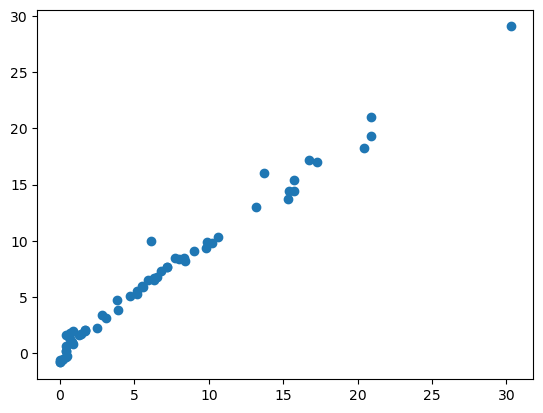

In [29]:
y_pred=lassocv.predict(x_test_scaler)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print('The score is:',score)   # This gives 98% accuracy which is very good

### Ridge regression model

Mean absolute error: 0.5642305340105692
The score is: 0.9842993364555513


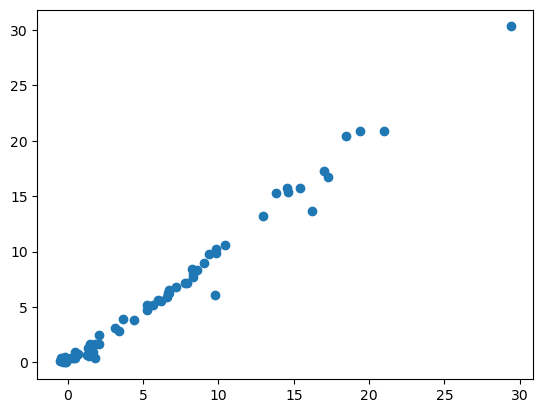

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaler,y_train)
y_pred=ridge.predict(x_test_scaler)
mae=mean_absolute_error(y_pred,y_test)
score=r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print('The score is:',score)
plt.scatter(y_pred,y_test)   # This gives 98% accuracy which is very good

### Cross validation using ridge

In [31]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaler,y_train)

RidgeCV(cv=5)

Mean absolute error: 0.5642305340105692
The score is: 0.9842993364555513


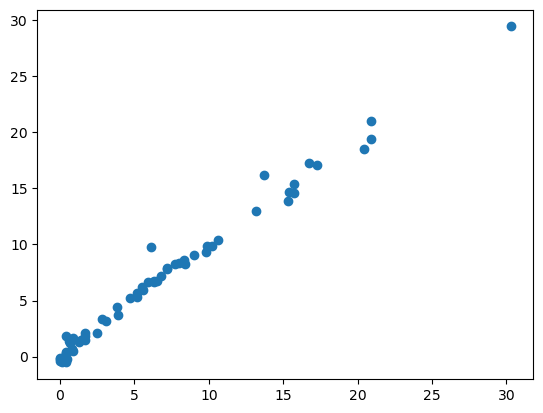

In [32]:
y_pred=ridgecv.predict(x_test_scaler)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print('The score is:',score)   # This gives 98% accuracy which is very good

In [33]:
ridgecv.get_params()  # These all parameter got selected

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### ElasticNet Regression

Mean absolute error: 1.8822353634896005
The score is: 0.8753460589519703


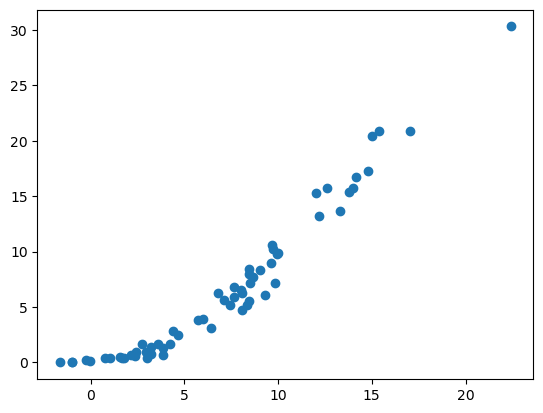

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet=ElasticNet()
elasticnet.fit(x_train_scaler,y_train)
y_pred=elasticnet.predict(x_test_scaler)
mae=mean_absolute_error(y_pred,y_test)
score=r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print('The score is:',score)
plt.scatter(y_pred,y_test)   # This gives 87% accuracy which is very good

In [35]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(x_train_scaler,y_train)

ElasticNetCV(cv=5)

Mean absolute error: 0.6575946731430898
The score is: 0.9814217587854941


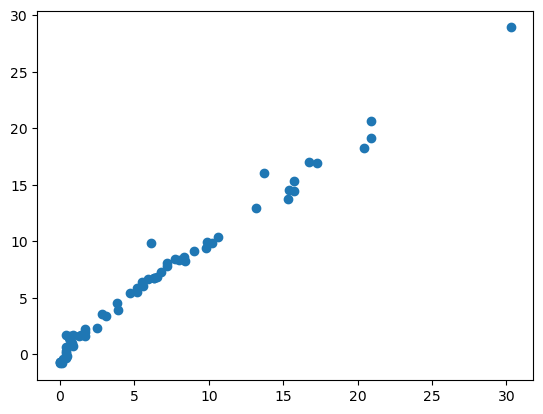

In [36]:
y_pred=elasticnetcv.predict(x_test_scaler)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error:',mae)
print('The score is:',score)   # This gives 98% accuracy which is very good

now whichever is giving best accuracy,pickle that model for doing the prediction

### Pickling the machine learning model,preprocessing model standardscaler

In [37]:
# Consider the regression with 94% accuracy
scaler

StandardScaler()

In [38]:
ridge  # ridge regression has highest accuracy

Ridge()

In [39]:
# Use these 2 model to pickle the file
import pickle

In [40]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

During prediction we can load these pickle file 
for doing standard scaling we use scaler.pkl and for prediction we will use ridge.pkl